In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('run_ten_test.csv')

In [3]:
df.tail()

,created_at,to_timestamp,obs_time,job_no,plant_type,mix_id,target_tph,act_pom_tph,agg_wb_tph,rec_wb_tph,...,mix_ten_alert,plant_status,ac_temp_alert,agg_temp_alert,mix_temp_alert,drum_shell_temp_alert,bh_exhaust_temp_alert,bh_inlet_stk_temp_alert,fuel2_oil_temp_alert,plant_stable
13745,1684778334122,2023-05-22 00:10:47,1684735847000,09-023,TCII,DA5C198960,200.0,197.63,161.04,17.63,...,G,P,G,G,G,G,G,Y,G,S
13746,1684778334122,2023-05-22 00:20:47,1684736447000,09-023,TCII,DA5C198960,200.0,196.42,164.20,18.79,...,G,P,G,G,G,G,G,G,G,S
13747,1684778334122,2023-05-22 00:30:47,1684737047000,09-023,TCII,DA5C198960,200.0,204.74,171.25,18.58,...,G,P,G,G,G,G,G,G,G,S
13748,1684778334122,2023-05-22 00:40:47,1684737647000,09-023,TCII,DA5C198960,200.0,201.14,159.09,18.18,...,G,P,G,G,G,G,G,Y,G,S
13749,1684778334122,2023-05-22 00:50:47,1684738247000,09-023,TCII,DA5C198960,200.0,199.33,160.15,16.39,...,G,P,G,G,G,G,G,G,G,S


In [4]:
df1 = df.set_index(pd.DatetimeIndex(df['to_timestamp'])).drop('to_timestamp',axis=1)

In [5]:
df1.tail()

,created_at,obs_time,job_no,plant_type,mix_id,target_tph,act_pom_tph,agg_wb_tph,rec_wb_tph,ac_tph,...,mix_ten_alert,plant_status,ac_temp_alert,agg_temp_alert,mix_temp_alert,drum_shell_temp_alert,bh_exhaust_temp_alert,bh_inlet_stk_temp_alert,fuel2_oil_temp_alert,plant_stable
to_timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-22 00:10:47,1684778334122,1684735847000,09-023,TCII,DA5C198960,200.0,197.63,161.04,17.63,9.99,...,G,P,G,G,G,G,G,Y,G,S
2023-05-22 00:20:47,1684778334122,1684736447000,09-023,TCII,DA5C198960,200.0,196.42,164.20,18.79,10.01,...,G,P,G,G,G,G,G,G,G,S
2023-05-22 00:30:47,1684778334122,1684737047000,09-023,TCII,DA5C198960,200.0,204.74,171.25,18.58,10.59,...,G,P,G,G,G,G,G,G,G,S
2023-05-22 00:40:47,1684778334122,1684737647000,09-023,TCII,DA5C198960,200.0,201.14,159.09,18.18,10.59,...,G,P,G,G,G,G,G,Y,G,S
2023-05-22 00:50:47,1684778334122,1684738247000,09-023,TCII,DA5C198960,200.0,199.33,160.15,16.39,10.35,...,G,P,G,G,G,G,G,G,G,S


In [6]:
df1 = df1[['drum_shell_temp']]

In [7]:
df_hour = df1.resample('H').mean().ffill()

In [8]:
df_hour.head()

,drum_shell_temp
to_timestamp,
2023-01-10 06:00:00,53.78
2023-01-10 07:00:00,53.39
2023-01-10 08:00:00,53.42
2023-01-10 09:00:00,57.14
2023-01-10 10:00:00,63.20


In [9]:
df_hour.isnull().sum()

drum_shell_temp    0
dtype: int64

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df_hour).reshape(-1,1))

In [12]:
df1

array([[0.10832278],
       [0.10682629],
       [0.10694141],
       ...,
       [0.60174974],
       [0.70818464],
       [0.73569702]])

In [13]:
training_size  = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data =  df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]

In [14]:
train_data.shape

(2214, 1)

In [15]:
test_data.shape

(949, 1)

In [16]:
def create_dataset(dataset,timeStep=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-timeStep-1):
        a = dataset[i:(i+timeStep),0]
        dataX.append(a)
        b = dataset[i+timeStep,0]
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [18]:
X_train,y_train = create_dataset(train_data,168)
X_test,y_test = create_dataset(test_data,168)

In [19]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2045, 168) (2045,) (780, 168) (780,)


In [20]:
X_train[0]

array([0.10832278, 0.10682629, 0.10694141, 0.12121561, 0.14446875,
       0.16403822, 0.18533441, 0.19852653, 0.1955796 , 0.21422816,
       0.20801197, 0.20184183, 0.19293197, 0.18554161, 0.17934845,
       0.17313227, 0.1702544 , 0.1670312 , 0.16122942, 0.15632554,
       0.15264188, 0.14838264, 0.14366294, 0.14009439, 0.13664096,
       0.13387821, 0.13295729, 0.14838264, 0.17796708, 0.20225624,
       0.21883274, 0.21866007, 0.2137677 , 0.22228617, 0.21583976,
       0.20570968, 0.19788189, 0.19155059, 0.18498906, 0.18234143,
       0.17911822, 0.17531944, 0.17059975, 0.16254173, 0.14838264,
       0.13491424, 0.12167607, 0.11097042, 0.10183032, 0.09439392,
       0.09354207, 0.09842293, 0.10383331, 0.11971912, 0.12582019,
       0.13123057, 0.1279383 , 0.13595027, 0.12800737, 0.11845286,
       0.11154599, 0.10705652, 0.10256705, 0.0976862 , 0.09347301,
       0.08886842, 0.08483942, 0.08104064, 0.07689651, 0.07321285,
       0.06987453, 0.06596063, 0.06112582, 0.05905376, 0.06239

In [21]:
## reshape into be like [samples,timeStep,features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
X_train.shape

(2045, 168, 1)

In [23]:
## create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam

In [24]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (168,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=Adam())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-29 00:29:15.885763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 00:29:15.886233: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 168, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 168, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=200,verbose=1)

Epoch 1/200


2023-05-29 00:29:23.968795: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-29 00:29:25.108337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:25.395960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:25.527914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:25.608205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:25.746576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/32 [..............................] - ETA: 1:04 - loss: 0.1856

2023-05-29 00:29:25.883170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:25.979894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.0660

2023-05-29 00:29:27.803996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:27.897311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:27.936476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 00:29:27.990723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 4s 74ms/step - loss: 0.0660 - val_loss: 0.0413
Epoch 2/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0481 - val_loss: 0.0286
Epoch 3/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0348 - val_loss: 0.0227
Epoch 4/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0207 - val_loss: 0.0178
Epoch 5/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0163 - val_loss: 0.0151
Epoch 6/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0139 - val_loss: 0.0160
Epoch 7/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 8/200
32/32 [==============================] - 2s 47ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 9/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0087 - val_loss: 0.0093
Epoch 10/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 11/20

In [90]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

30/30 [==============================] - 0s 6ms/step


In [91]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

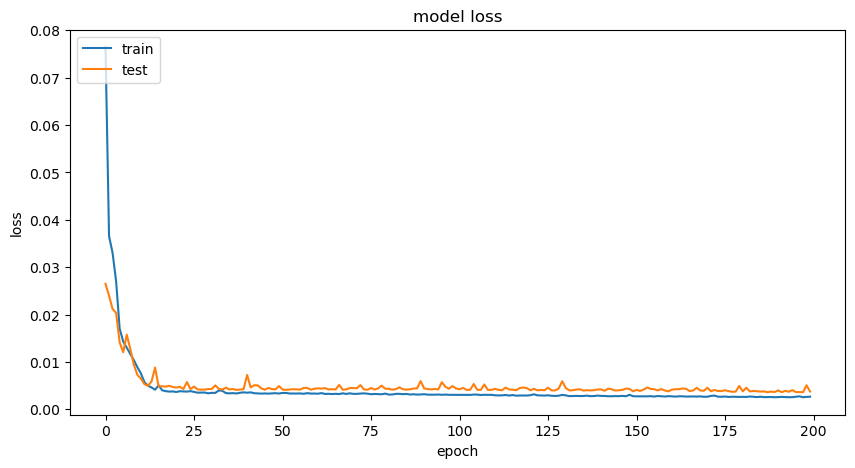

In [92]:
# history for loss
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [94]:
y_test_inverse = pd.DataFrame(y_test_inv) 

In [95]:
y_test_inverse.index = df_hour.index[-len(y_test):] 

In [96]:
y_test_inverse

,0
to_timestamp,
2023-04-12 20:00:00,220.280
2023-04-12 21:00:00,188.960
2023-04-12 22:00:00,194.360
2023-04-12 23:00:00,194.360
2023-04-13 00:00:00,194.360
...,...
2023-05-21 20:00:00,81.356
2023-05-21 21:00:00,81.140
2023-05-21 22:00:00,126.200


In [97]:
y_pred_inverse = pd.DataFrame(test_predict) 

In [98]:
y_pred_inverse.index = y_test_inverse.index 

In [99]:
y_pred_inverse.reset_index(inplace=True)
y_test_inverse.reset_index(inplace=True)

In [100]:
act_pred_df_1 = y_test_inverse.merge(y_pred_inverse,how='right',on='to_timestamp')

In [101]:
act_pred_df_1.rename({'0_x':'actual','0_y':'prediction'},inplace=True,axis=1)

In [105]:
act_pred_df_1['error'] = act_pred_df_1['prediction']-act_pred_df_1['actual']

In [108]:
act_pred_df_1.error=act_pred_df_1.error.abs()

In [117]:
act_pred_df_1['accuracy'] = (act_pred_df_1['prediction'].mean()/act_pred_df_1['actual'].mean())*100

In [53]:
train_predict

array([[ 75.69706 ],
       [ 73.431526],
       [ 64.79465 ],
       ...,
       [116.7552  ],
       [193.2983  ],
       [218.06232 ]], dtype=float32)

In [119]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.1186566729176

In [136]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,test_predict)

320.6286201158167

In [120]:
math.sqrt(mean_squared_error(y_test,test_predict))

182.01178086470003

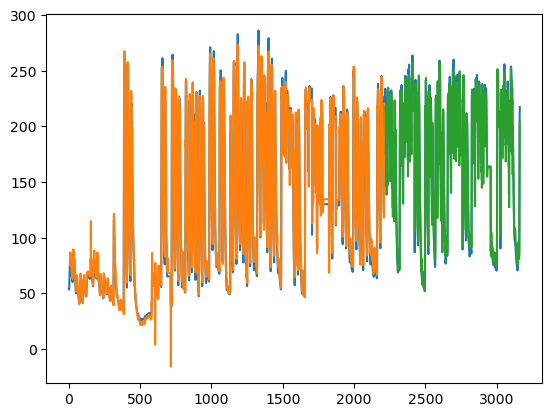

In [121]:
## plotting
# shift train prediction for plotting
import matplotlib.pyplot as plt
look_back = 7
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [122]:
len(test_data)

949

In [123]:
x_input = test_data[(len(test_data)-look_back):].reshape(1,-1)

In [124]:
x_input.shape

(1, 7)

In [125]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [126]:
temp_input

[0.21653044779555664,
 0.21413606538505814,
 0.21330724070450102,
 0.38620927823184076,
 0.6017497409922875,
 0.708184643720502,
 0.7356970185334409]

In [127]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=7
i=0
while(i<10):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.74057853]
8
1 day input [0.21413607 0.21330724 0.38620928 0.60174974 0.70818464 0.73569702
 0.74057853]
1 day output [[0.742064]]
2 day input [0.21330724 0.38620928 0.60174974 0.70818464 0.73569702 0.74057853
 0.742064  ]
2 day output [[0.7387206]]
3 day input [0.38620928 0.60174974 0.70818464 0.73569702 0.74057853 0.742064
 0.7387206 ]
3 day output [[0.7266145]]
4 day input [0.60174974 0.70818464 0.73569702 0.74057853 0.742064   0.7387206
 0.72661448]
4 day output [[0.70129836]]
5 day input [0.70818464 0.73569702 0.74057853 0.742064   0.7387206  0.72661448
 0.70129836]
5 day output [[0.6662843]]
6 day input [0.73569702 0.74057853 0.742064   0.7387206  0.72661448 0.70129836
 0.66628432]
6 day output [[0.62800443]]
7 day input [0.74057853 0.742064   0.7387206  0.72661448 0.70129836 0.66628432
 0.62800443]
7 day output [[0.5900996]]
8 day input [0.742064   0.7387206  0.72661448 0.70129836 0.66628432 0.62800443
 0.59009957]
8 day output [[0.5541731]]
9 day input [0.7387206  0.72661448 

In [128]:
day_new=np.arange(1,8)
day_pred=np.arange(8,18)

In [129]:
import matplotlib.pyplot as plt
len(df1)

3163

In [130]:
3163-7

3156

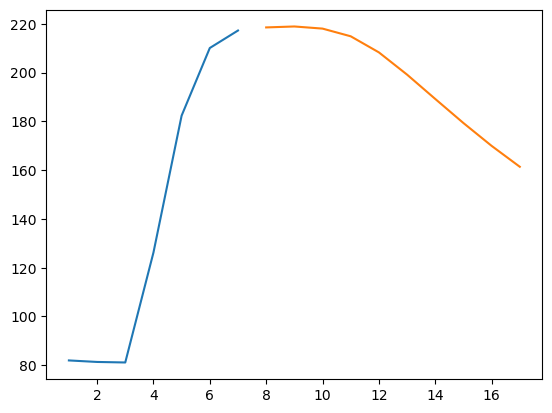

In [131]:
plt.plot(day_new,scaler.inverse_transform(df1[3156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

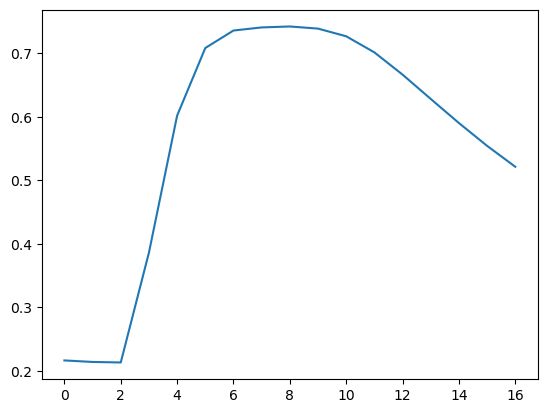

In [132]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3156:])

In [133]:
df3

[[0.10832278116726145],
 [0.10682629216069993],
 [0.10694140669966616],
 [0.12121560953148382],
 [0.14446874640267066],
 [0.1640382180269368],
 [0.1853344077356971],
 [0.1985265339012317],
 [0.1955796017036952],
 [0.21422815701623116],
 [0.2080119719120525],
 [0.2018418326234604],
 [0.19293196730747092],
 [0.1855416139058363],
 [0.17934845170945096],
 [0.17313226660527226],
 [0.1702544031311155],
 [0.1670311960400599],
 [0.1612294232761598],
 [0.15632554391619663],
 [0.15264187866927592],
 [0.14838264072752388],
 [0.1436629446299068],
 [0.1400943939219524],
 [0.1366409577529642],
 [0.13387820881777368],
 [0.1329572925060435],
 [0.14838264072752388],
 [0.17796707724185562],
 [0.20225624496373895],
 [0.218832738574882],
 [0.21866006676643263],
 [0.21376769886036612],
 [0.2222861747438702],
 [0.21583976056175896],
 [0.20570968113272708],
 [0.19788189248302063],
 [0.1915505928398757],
 [0.18498906411879823],
 [0.182341429722574],
 [0.1791182226315184],
 [0.1753194428456314],
 [0.1705997467

In [134]:
df3=scaler.inverse_transform(df3).tolist()

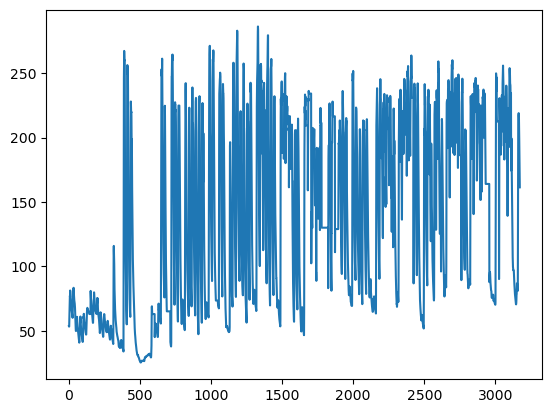

In [135]:
plt.plot(df3)

In [143]:
len(df3)

3173